In [1]:
# import spacec first
import spacec as sp

#import standard packages
import os
import warnings
import matplotlib
import pickle
warnings.filterwarnings('ignore')

# set the default color map to viridis, the below paramters can be chanaged
matplotlib.rcParams["image.cmap"] = 'viridis'

/dss/dsshome1/00/ge65tib2/miniconda3/envs/spacec/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
2025-06-23 00:08:54.944890: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/compat/lib.real:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2025-06-23 00:08:54.945062: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
INFO:root: * TissUUmaps version: 3.1.1.6


In [2]:
# Specify the path to the data
root_path = "/dss/dsshome1/00/ge65tib2/Spacec/" # replace with your path
data_path = root_path + 'example_data/raw/' # where the data is stored

# where you want to store the output
output_dir = root_path + 'example_data/output/'
os.makedirs(output_dir, exist_ok=True)

In [3]:
#check if GPU availability
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Fri_Jun_14_16:34:21_PDT_2024
Cuda compilation tools, release 12.6, V12.6.20
Build cuda_12.6.r12.6/compiler.34431801_0
Mon Jun 23 00:10:04 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.247.01             Driver Version: 535.247.01   CUDA Version: 12.6     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           On  | 00000000:00:06.0 Off |                    0 |
| N/A   58C    P0              40W / 250

In [4]:
sp.hf.check_for_gpu()

GPU is not available to Tensorflow


2025-06-23 00:10:05.003409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-23 00:10:05.005999: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /dss/dsshome1/00/ge65tib2/miniconda3/envs/spacec/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/compat/lib.real:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2025-06-23 00:10:05.006638: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /dss/dsshome1/00/ge65tib2/miniconda3/envs/spacec/lib/p

GPU is available to Pytorch


True

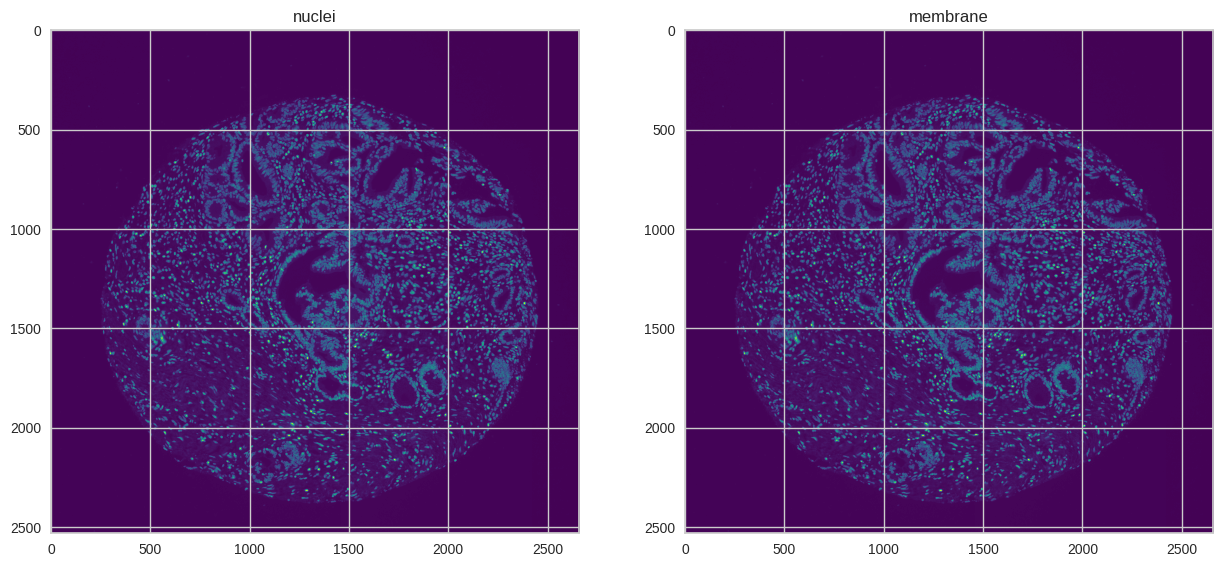

In [5]:
# (optional, one can just use nuclei for segmentation)
# Visualize membrane channels to use for cell segmentation 

sp.pl.segmentation_ch(
    file_name = output_dir + '2_4.tif', # image for segmentation
    channel_file ='/dss/dsshome1/00/ge65tib2/channelnames_tma.txt', # all channels used for staining
    output_dir = output_dir, #
    extra_seg_ch_list = ["DAPI"], #default is None; if provide more than one channel, then they will be combined
    nuclei_channel = 'DAPI', # channel to use for nuclei segmentation
    input_format = 'Multichannel', 
)

Create image channels!
Segmenting with Mesmer!
downloading Mesmer model
Mesmer model downloaded and unpacked


2025-06-07 21:38:35.150529: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:root:Converting image dtype to float


No membrane image provided. Nuclear segmentation only.


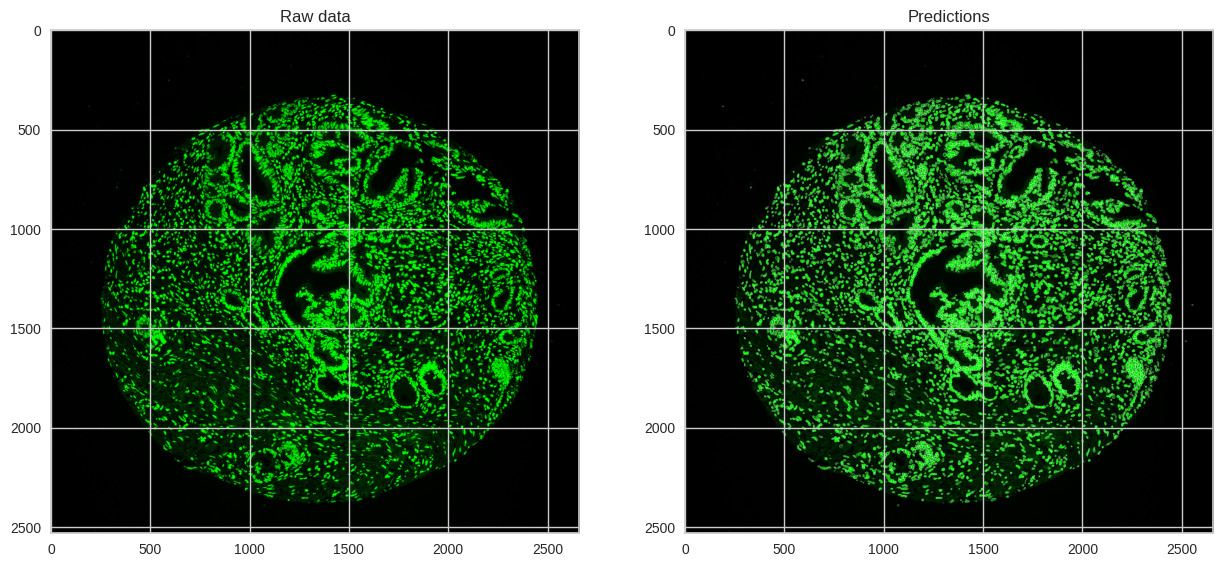

Quantifying features after segmentation!


Processing channels: 100%|██████████| 40/40 [00:04<00:00,  9.41it/s]


Done!


In [8]:
# choose between cellpose or mesmer for segmentation
# first image
# seg_output contains {'img': img, 'image_dict': image_dict, 'masks': masks}
seg_output_2_4 = sp.tl.cell_segmentation(
    file_name = output_dir + '2_4.tif',
    channel_file = '/dss/dsshome1/00/ge65tib2/channelnames_tma.txt',
    output_dir = output_dir,
    seg_method ='mesmer', # cellpose or mesmer
    nuclei_channel = 'DAPI',
    output_fname = '2_4', #default is None; if provide more than one channel, then they will be combined
    compartment = 'nuclei', # mesmer # segment whole cells or nuclei only
    input_format ='Multichannel', # Phenocycler or codex
    resize_factor=1, # default is 1; if the image is too large, lower the value. Lower values will speed up the segmentation but may reduce the accuracy.
    size_cutoff = 0)

Create image channels!
Segmenting with Mesmer!
No membrane image provided. Nuclear segmentation only.


INFO:root:Converting image dtype to float


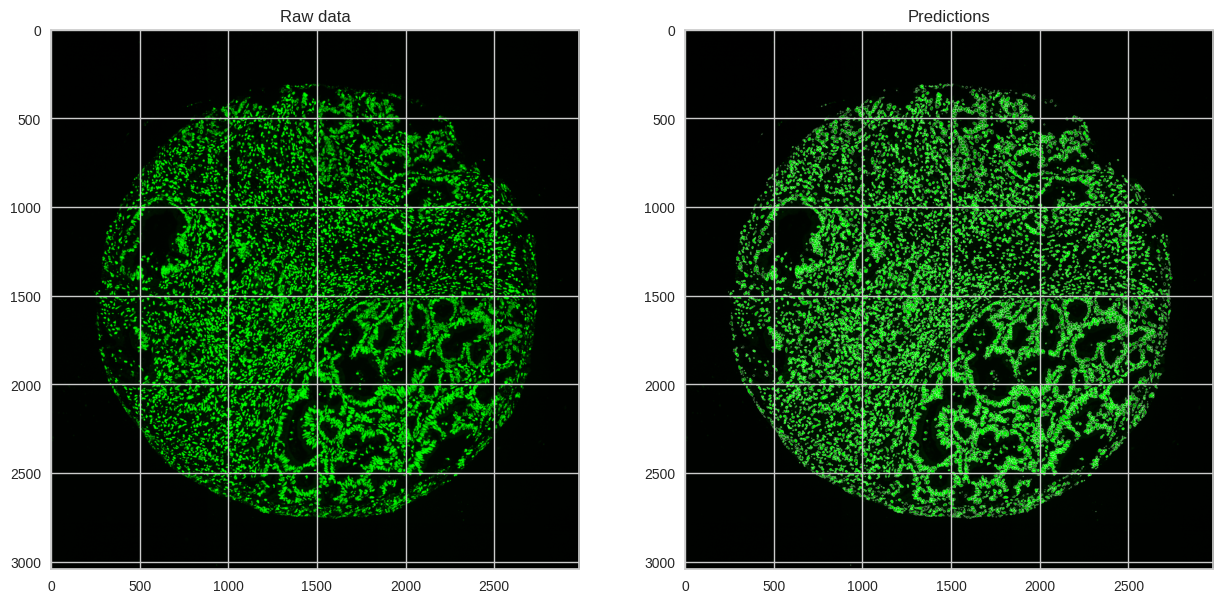

Quantifying features after segmentation!


Processing channels: 100%|██████████| 40/40 [00:05<00:00,  7.12it/s]


Done!


In [9]:
# second image
# choose the method that is consistent of the first image for a more comparable result
# seg_output contains {'img': img, 'image_dict': image_dict, 'masks': masks}
seg_output_5_5 = sp.tl.cell_segmentation(
    file_name = output_dir + '5_5.tif',
    channel_file = '/dss/dsshome1/00/ge65tib2/channelnames_tma.txt',
    output_dir = output_dir,
    output_fname = '5_5',
    seg_method ='mesmer', # cellpose or mesmer
    nuclei_channel = 'DAPI', #default is None #default is None; if provide more than one channel, then they will be combined
    input_format ='Multichannel', # Phenocycler or codex
    compartment = 'nuclei', # mesmer # segment whole cells or nuclei only
    resize_factor=1, # default is 1; if the image is too large, lower the value. Lower values will speed up the segmentation but may reduce the accuracy.
    size_cutoff = 0)

In [7]:
help(sp.tl.cell_segmentation)

Help on function cell_segmentation in module spacec.tools._segmentation:

cell_segmentation(file_name, channel_file, output_dir, output_fname='', seg_method='mesmer', nuclei_channel='DAPI', input_format='Multichannel', membrane_channel_list=None, size_cutoff=0, compartment='whole-cell', plot_predictions=True, model='cyto3', use_gpu=True, cytoplasm_channel_list=None, diameter=None, save_mask_as_png=False, model_path='./models', resize_factor=1, custom_model=False, differentiate_nucleus_cytoplasm=False)
    Perform cell segmentation on an image.
    Parameters
    ----------
    file_name : str
        The path to the image file.
    channel_file : str
        The path to the file containing the channel names.
    output_dir : str
        The directory where the output will be saved.
    output_fname : str, optional
        The name of the output file. Default is an empty string.
    seg_method : str
        The segmentation method to use. Options are 'mesmer' and 'cellpose'. Default is 

In [6]:
seg_output_2_4_cellpose = sp.tl.cell_segmentation(
    file_name = output_dir + '2_4.tif',
    channel_file = '/dss/dsshome1/00/ge65tib2/channelnames_tma.txt',
    output_dir = output_dir,
    output_fname = '2_4_cellpose',
    seg_method ='cellpose', # cellpose or mesmer
    model='nuclei', # cellpose model
     # average cell diameter (in pixels). If set to None, it will be automatically estimated.
    nuclei_channel = 'DAPI',
    compartment = 'nuclei', 
    input_format ='Multichannel', # Phenocycler or codex
    resize_factor=1, # default is 1; if the image is too large, lower the value. Lower values will speed up the segmentation but may reduce the accuracy.
    size_cutoff = 0,
    flow_threshold = 0.6
) 

TypeError: cell_segmentation() got an unexpected keyword argument 'flow_threshold'

In [ ]:
seg_output_5_5_cellpose = sp.tl.cell_segmentation(
    file_name = output_dir + '5_5.tif',
    channel_file = '/dss/dsshome1/00/ge65tib2/channelnames_tma.txt',
    output_dir = output_dir,
    output_fname = '5_5_cellpose',
    seg_method ='cellpose', # cellpose or mesmer
    model='nuclei', # cellpose model
     # average cell diameter (in pixels). If set to None, it will be automatically estimated.
    nuclei_channel = 'DAPI',
    compartment = 'nuclei', 
    input_format ='Multichannel', # Phenocycler or codex
    resize_factor=1, # default is 1; if the image is too large, lower the value. Lower values will speed up the segmentation but may reduce the accuracy.
    size_cutoff = 0,
    flow_threshold = 0.6) 

In [12]:
# check the model involved in the cellpose
from cellpose import models
print(models.MODEL_NAMES)

['cyto3', 'nuclei', 'cyto2_cp3', 'tissuenet_cp3', 'livecell_cp3', 'yeast_PhC_cp3', 'yeast_BF_cp3', 'bact_phase_cp3', 'bact_fluor_cp3', 'deepbacs_cp3', 'cyto2', 'cyto', 'transformer_cp3', 'neurips_cellpose_default', 'neurips_cellpose_transformer', 'neurips_grayscale_cyto2']


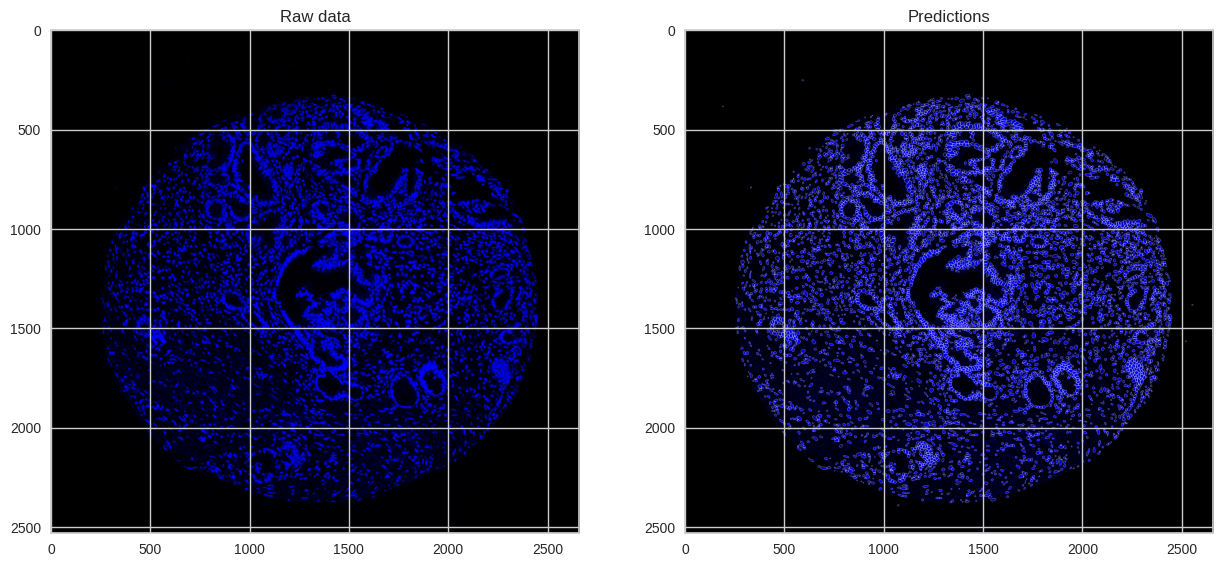

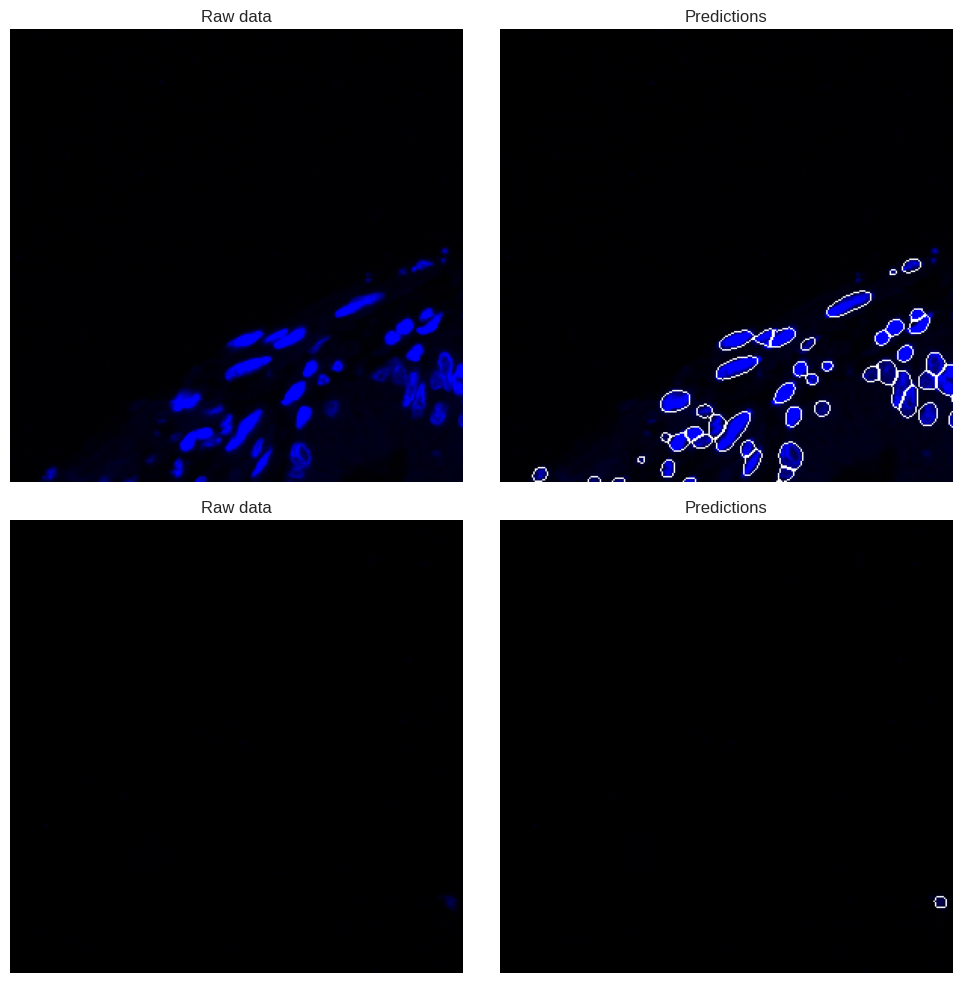

In [13]:
overlay_data1, rgb_images1 = sp.pl.show_masks(
    seg_output=seg_output_2_4,
    nucleus_channel = 'DAPI', # additional channels to display (displayed in green - channels will be combined into one image)
    show_subsample = True, # show a random subsample of the image
    n=2, #need to be at least 2
    tilesize = 300,# number of subsamples and tilesize
    rand_seed = 1)


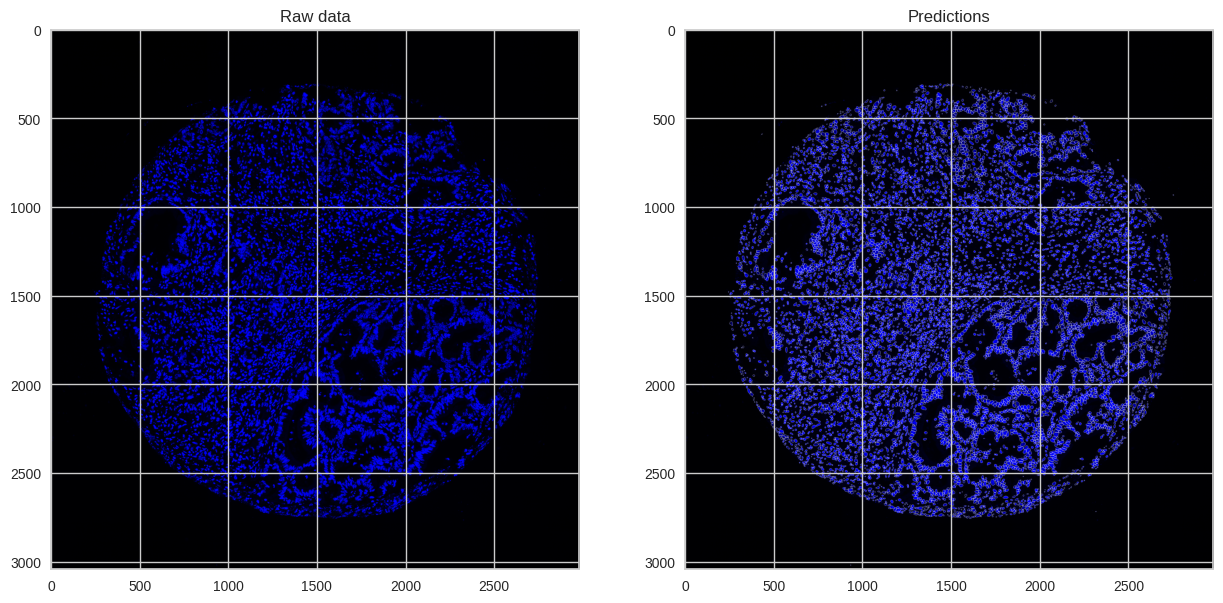

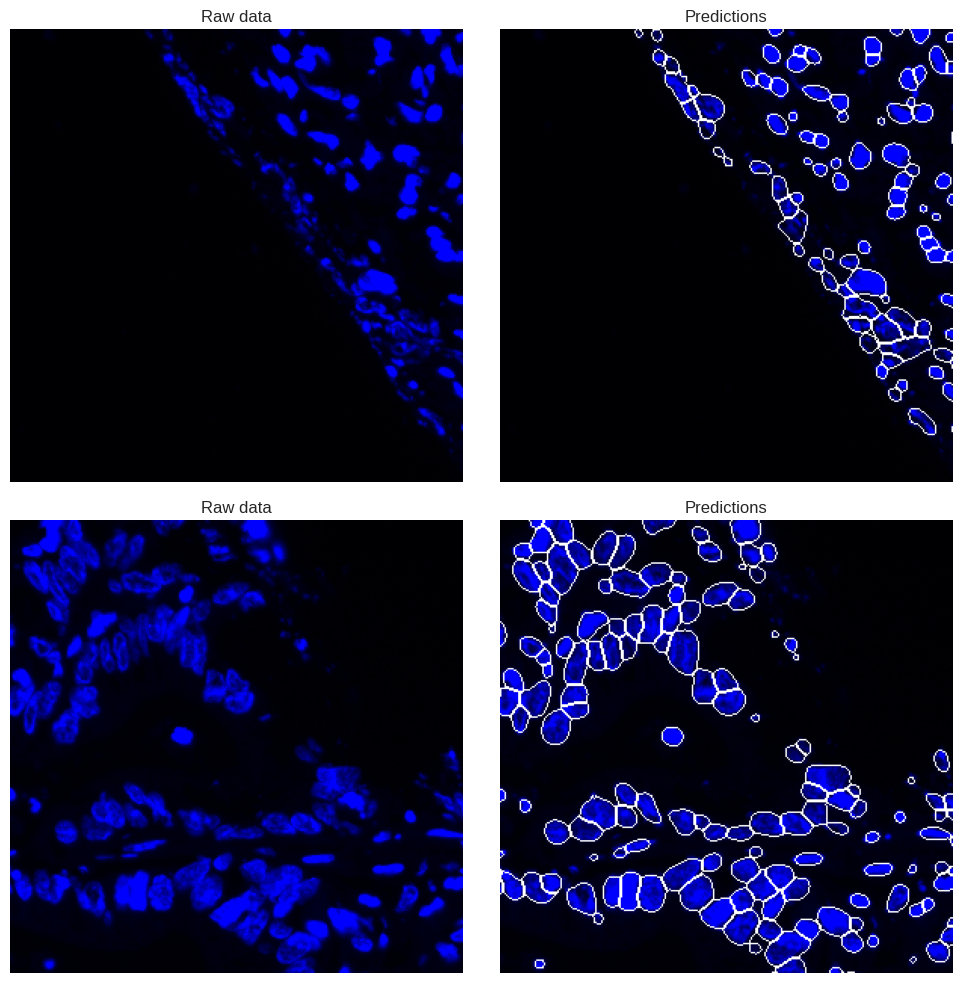

In [14]:
overlay_data2, rgb_images2 = sp.pl.show_masks(
    seg_output=seg_output_5_5,
    nucleus_channel = 'DAPI', # additional channels to display (displayed in green - channels will be combined into one image)
    show_subsample = True, # show a random subsample of the image
    n=2, #need to be at least 2
    tilesize = 300,# number of subsamples and tilesize
    rand_seed = 1)

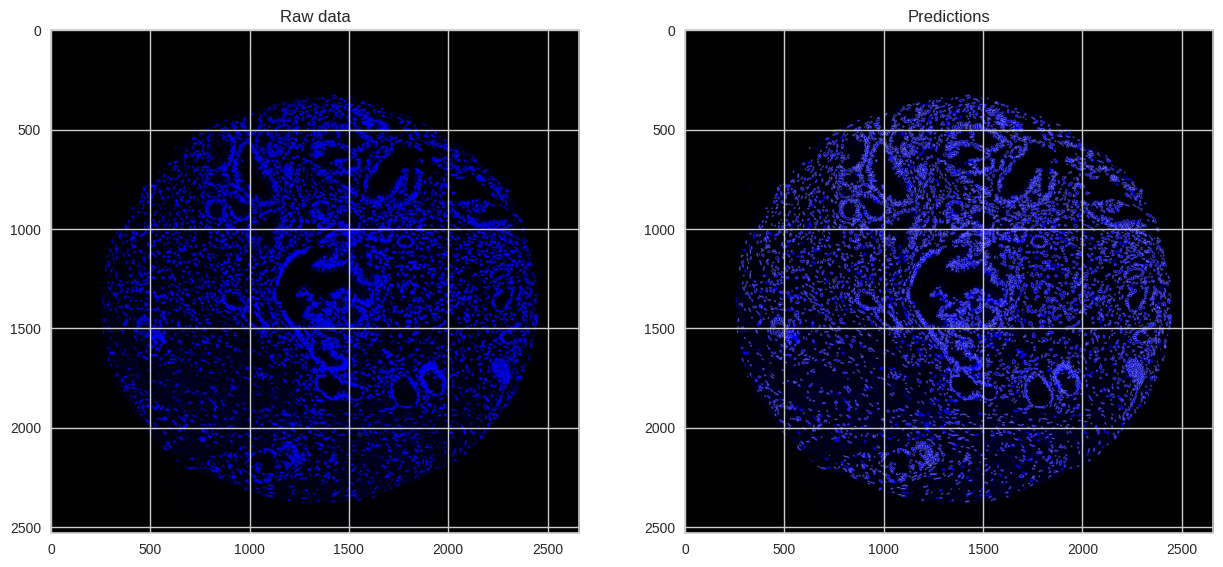

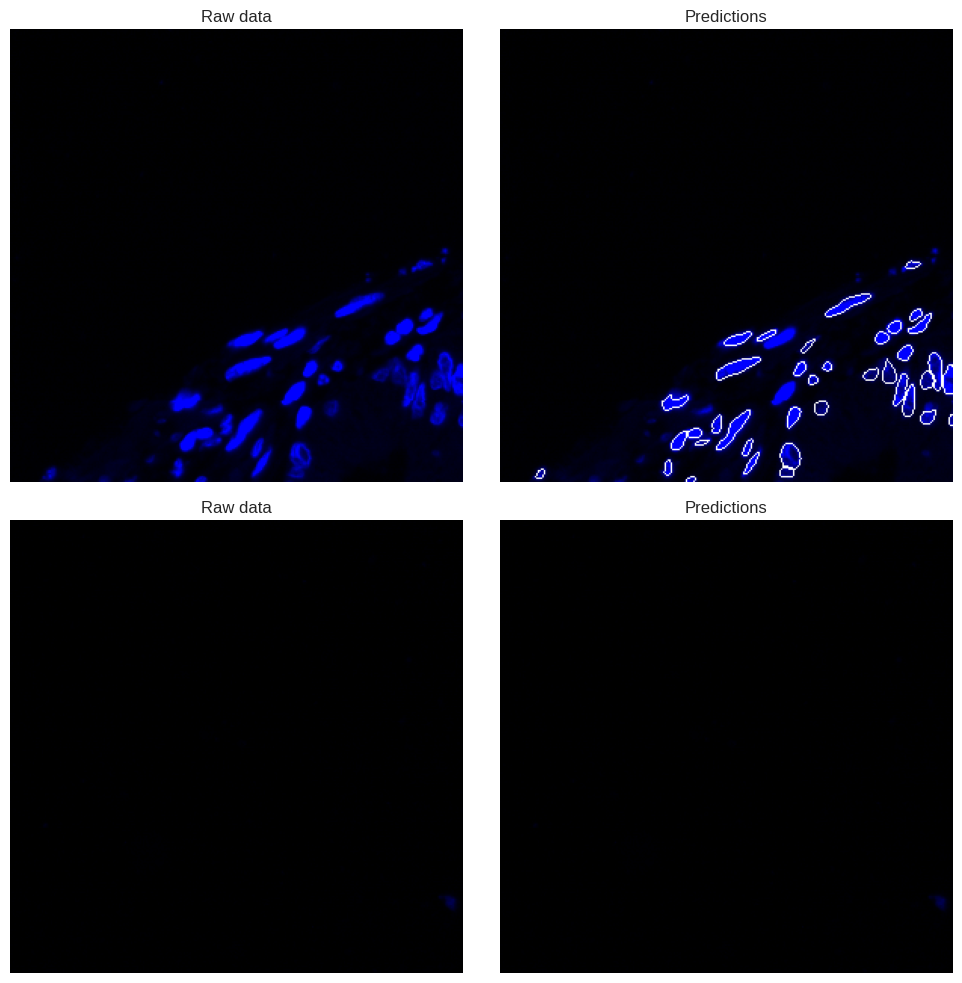

In [15]:
overlay_data3, rgb_images3 = sp.pl.show_masks(
    seg_output=seg_output_2_4_cellpose,
    nucleus_channel = 'DAPI', # additional channels to display (displayed in green - channels will be combined into one image)
    show_subsample = True, # show a random subsample of the image
    n=2, #need to be at least 2
    tilesize = 300,# number of subsamples and tilesize
    rand_seed = 1)

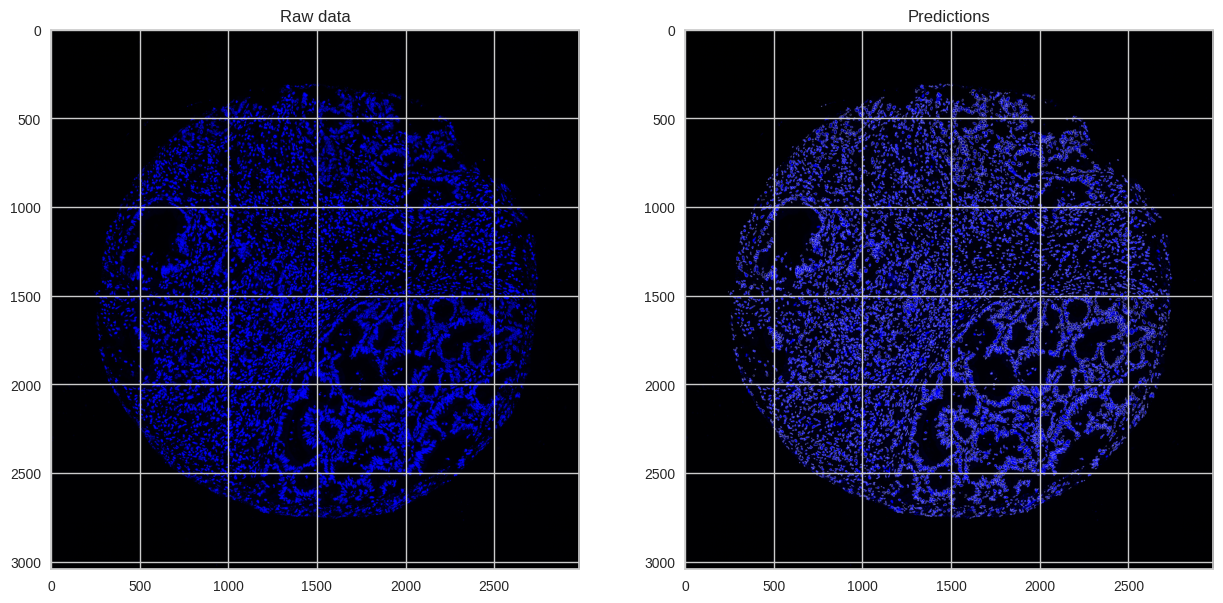

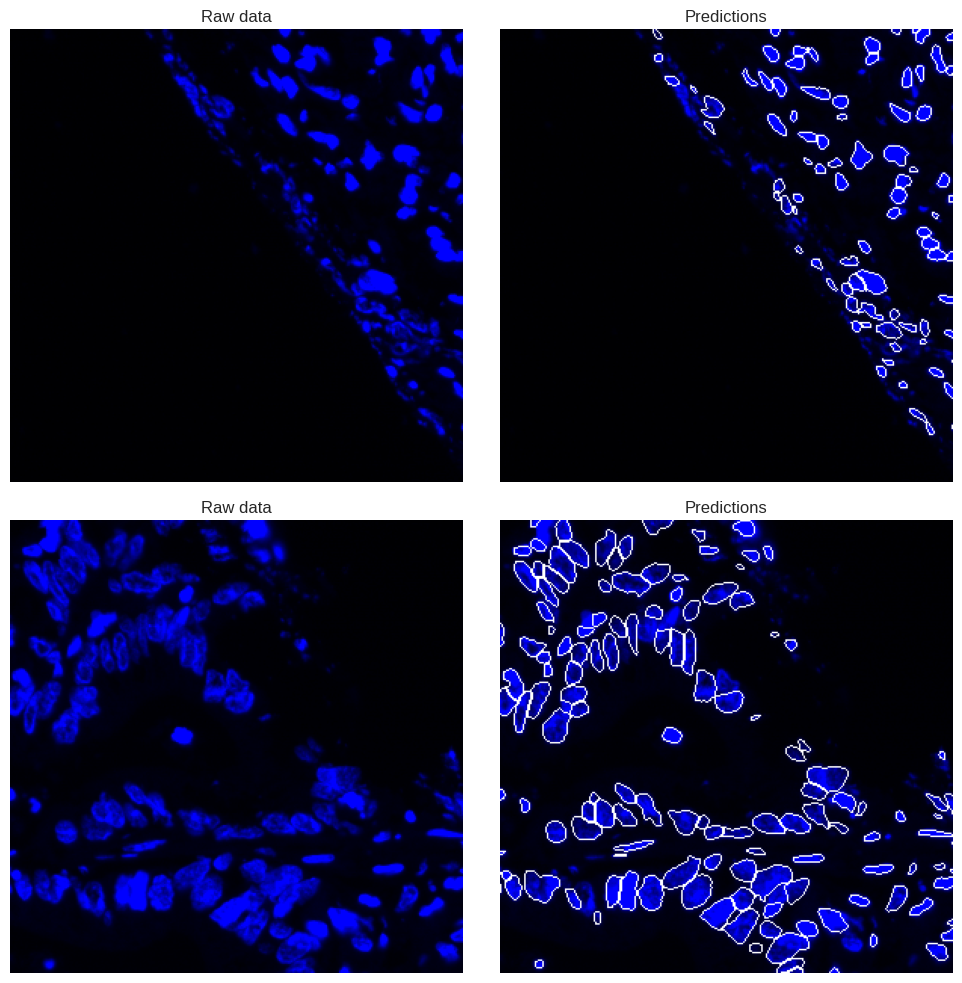

In [16]:
overlay_data4, rgb_images4 = sp.pl.show_masks(
    seg_output=seg_output_5_5_cellpose,
    nucleus_channel = 'DAPI', # additional channels to display (displayed in green - channels will be combined into one image)
    show_subsample = True, # show a random subsample of the image
    n=2, #need to be at least 2
    tilesize = 300,# number of subsamples and tilesize
    rand_seed = 1)

In [17]:
#Save segmentation output
with open(output_dir + 'seg_output_2_4.pickle', 'wb') as f:
    pickle.dump(seg_output_2_4, f)

with open(output_dir + 'seg_output_5_5.pickle', 'wb') as f:
    pickle.dump(seg_output_5_5, f)
    
#Save the overlay of the data
with open(output_dir + 'seg_output_2_4_cellpose.pickle', 'wb') as f:
    pickle.dump(seg_output_2_4_cellpose, f)

with open(output_dir + 'seg_output_5_5_cellpose.pickle', 'wb') as f:
    pickle.dump(seg_output_5_5_cellpose, f)